
### 1. Análisis y pronóstico de series de tiempo

- Seleccionar una base de datos con al menos una serie de tiempo univariada (se sugiere además considerar variables adicionales para generar un enfoque multivariado que se usará posteriormente).
- Aplicar un modelo de pronóstico **lineal clásico** (por ejemplo, SARIMAX) **solo para el caso univariado**. Recuerda usar y argumentar todo el análisis que debe ser realizado para este tipo de modelos.
- Evaluar el desempeño del modelo lineal como línea base (Usar métricas como MAPE, MSE y $R^2$).

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

In [69]:
df = pd.read_csv("Data/air_quality_clean.csv")
df

,Datetime,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10 21:00:00,2.2,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1.6,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04 10:00:00,3.1,1314.0,13.5,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2005-04-04 11:00:00,2.4,1163.0,11.4,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2005-04-04 12:00:00,2.4,1142.0,12.4,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2005-04-04 13:00:00,2.1,1003.0,9.5,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139


## Modelo lineal básico

In [70]:
# Seleccionar la serie univariada
series = df['CO(GT)']

In [ ]:
# Separar train y test
train_size = int(len(series) * 0.8) # 80% para train
train, test = series[:train_size], series[train_size:]

In [101]:
# Ajustar modelo SARIMAX base
model = SARIMAX(train, order=(1,0,1), seasonal_order=(1,0,1,24), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

/home/maripau/Documents/ITESO/Semestre6/Modelos no lineales/ProyectoFinal/air_proyecto/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/maripau/Documents/ITESO/Semestre6/Modelos no lineales/ProyectoFinal/air_proyecto/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


In [102]:
# Pronosticar
forecast = model_fit.forecast(steps=len(test))

In [103]:
    # Evaluación
mape = mean_absolute_percentage_error(test, forecast)
mse = mean_squared_error(test, forecast)
r2 = r2_score(test, forecast)

print(f"MAPE: {mape:.3f}")
print(f"MSE: {mse:.3f}")
print(f"R²: {r2:.3f}")

MAPE: 0.741
MSE: 1.431
R²: 0.222


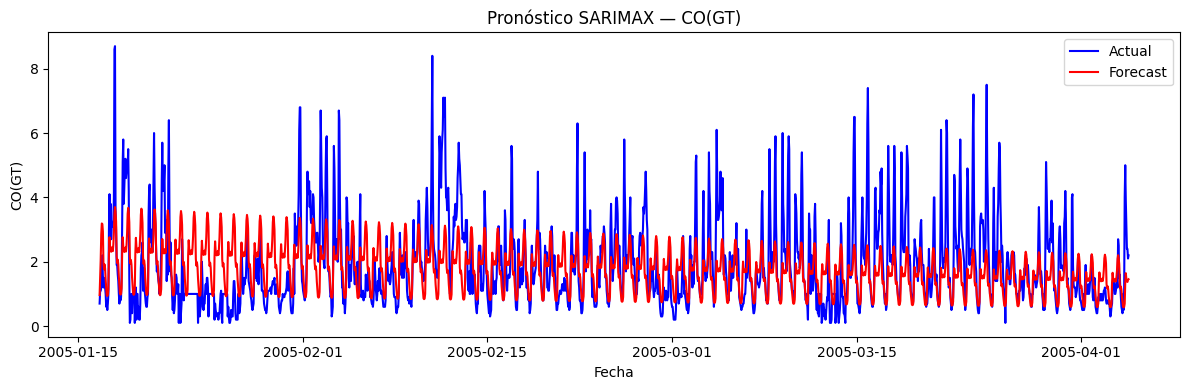

In [104]:
plt.figure(figsize=(12,4))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Pronóstico SARIMAX — CO(GT)')
plt.xlabel('Fecha')
plt.ylabel('CO(GT)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Rango de parámetros
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
s = 24  # estacionalidad diaria (horaria)

# Guardar resultados
mejores_resultados = []
mejor_r2 = -np.inf
mejores_parametros = None

# Grid Search
for order in [(i, j, k) for i in p for j in d for k in q]:
    for seasonal_order in [(i, j, k, s) for i in P for j in D for k in Q]:
        try:
            model = SARIMAX(train, order=order, seasonal_order=seasonal_order,
                            enforce_stationarity=False, enforce_invertibility=False)
            fit = model.fit(disp=False)
            forecast = fit.forecast(steps=len(test))
            r2 = r2_score(test, forecast)
            mape = mean_absolute_percentage_error(test, forecast)
            mse = mean_squared_error(test, forecast)
            mejores_resultados.append((order, seasonal_order, r2, mape, mse))
            if r2 > mejor_r2:
                mejor_r2 = r2
                mejores_parametros = (order, seasonal_order)
        except:
            continue

# Mostrar mejores parámetros
print("Mejor modelo:")
print("Order:", mejores_parametros[0])
print("Seasonal Order:", mejores_parametros[1])
print(f"R²: {mejor_r2:.3f}")


/home/maripau/Documents/ITESO/Semestre6/Modelos no lineales/ProyectoFinal/air_proyecto/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/maripau/Documents/ITESO/Semestre6/Modelos no lineales/ProyectoFinal/air_proyecto/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/maripau/Documents/ITESO/Semestre6/Modelos no lineales/ProyectoFinal/air_proyecto/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/maripau/Documents/ITESO/Semestre6/Modelos no lineales/ProyectoFinal/air_proyecto/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarnin

Mejor modelo:
Order: (0, 0, 2)
Seasonal Order: (1, 0, 1, 24)
R²: 0.250
